In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('cardiotocography1', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('cardiotocography1', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('cardiotocography1')
num_tries = 15

dataset_shapes

([21], [10])

### S(2,2,2)

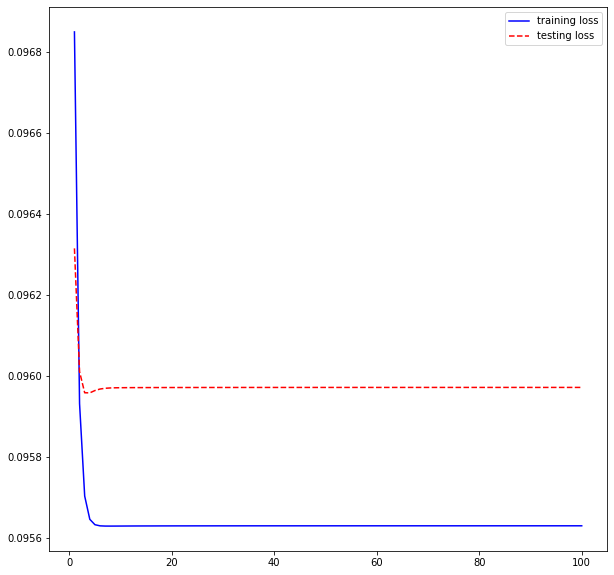

Elapsed training time: 45.10596 sec
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 21)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 44        
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                30        
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[2,2,2], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=100, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### S(10,7,5)

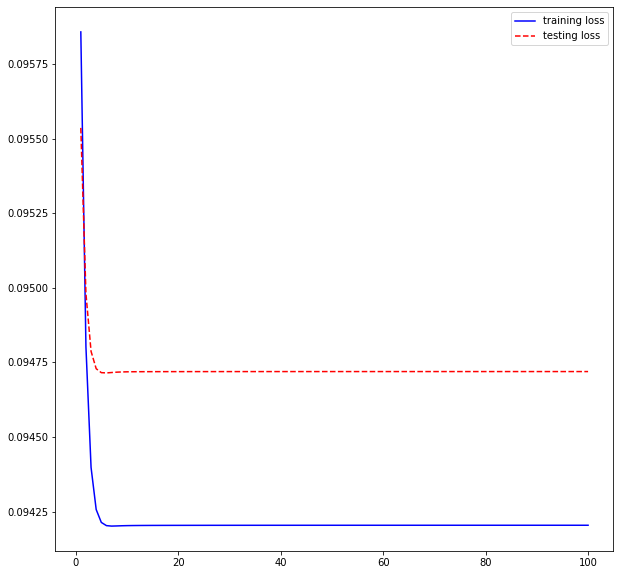

Elapsed training time: 44.33742 sec
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 21)]              0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                220       
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 77        
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_27 (Dense)             (None, 10)                60        
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[10,7,5], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=100, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(2):U(2)

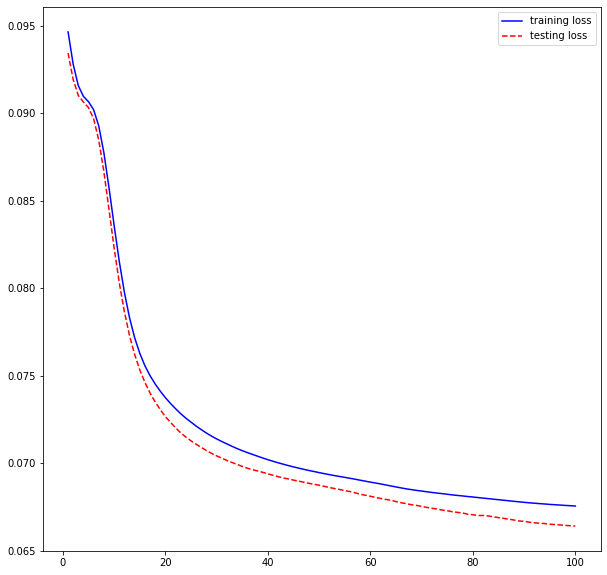

Elapsed training time: 54.38096 sec
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 21)]              0         
_________________________________________________________________
v_input_8 (VInput)           (None, 22, 2)             44        
_________________________________________________________________
v_fractal_8 (VFractal)       (None, 3, 10)             178       
_________________________________________________________________
v_output_9 (VOutput)         (None, 10)                0         
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(2,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=100, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(5):U(2)

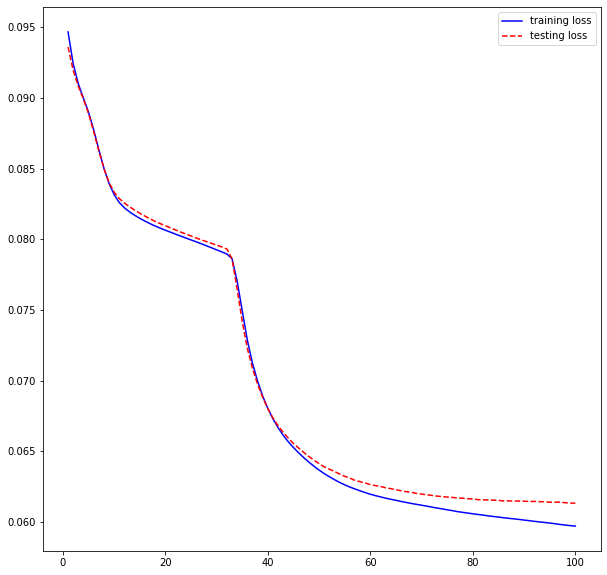

Elapsed training time: 53.83319 sec
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 21)]              0         
_________________________________________________________________
v_input_10 (VInput)          (None, 22, 5)             110       
_________________________________________________________________
v_fractal_10 (VFractal)      (None, 6, 10)             430       
_________________________________________________________________
v_output_11 (VOutput)        (None, 10)                0         
Total params: 540
Trainable params: 540
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=100, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)